# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\samar\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

# 1.4 preprocessing of project_grade_category

In [7]:
prj_grade_cat = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

prj_grade_cat_list = []
for i in prj_grade_cat:
    for j in i.split(' '): # it will split by space
        j=j.replace('Grades','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    prj_grade_cat_list.append(j.strip())

project_data['clean_grade'] = prj_grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grade'].values:
    my_counter.update(word.split())
    
prj_grade_cat_dict = dict(my_counter)
sorted_prj_grade_cat_dict = dict(sorted(prj_grade_cat_dict.items(), key=lambda kv: kv[1]))

project_data['clean_grade'].values

array(['PreK-2', '6-8', '6-8', ..., 'PreK-2', '3-5', '6-8'], dtype=object)

# 1.5 preprocessing of teacher_prefix

In [8]:
#tea_pfx_cat = list(project_data['teacher_prefix'].values)
tea_pfx_cat = list(project_data['teacher_prefix'].astype(str).values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

##https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
#vectorizer.fit(project_data['teacher_prefix'].astype(str).values)

tea_pfx_cat_list = []
for i in tea_pfx_cat:
    #for j in i.split(' '): # it will split by space
    #j=j.replace('.','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    i=i.replace('.','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    i=i.replace('nan','') # if we have the words "Grades" we are going to replace it with ''(i.e removing 'Grades')
    tea_pfx_cat_list.append(i.strip())

project_data['clean_tea_pfx'] = tea_pfx_cat_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_tea_pfx'].values:
    my_counter.update(word.split())
    
tea_pfx_cat_dict = dict(my_counter)
sorted_tea_pfx_cat_dict = dict(sorted(tea_pfx_cat_dict.items(), key=lambda kv: kv[1]))

project_data['clean_tea_pfx'].values

array(['Mrs', 'Mr', 'Ms', ..., 'Mrs', 'Mrs', 'Ms'], dtype=object)

## 1.6 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_grade  \
0             Literacy_Language                  ESL Literacy      PreK-2   
1  History_Civics Health_Sports  Civics_Government TeamSports         6-8   

  clean_tea_pfx                                              essay  
0           Mrs  My students are English learners that are work...  
1            Mr  Our students arrive to our school eager to lea...

### Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:30<00:00, 1207.35it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.7 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_grade  \
0             Literacy_Language                  ESL Literacy      PreK-2   
1  History_Civics Health_Sports  Civics_Government TeamSports         6-8   

  clean_tea_pfx                                              essay  
0           Mrs  My students are English learners that are work...  
1            Mr  Our students arrive to our school eager to lea...

In [20]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [21]:
sent_title = decontracted(project_data['project_title'].values[20000])
print(sent_title)
print("="*50)

We Need To Move It While We Input It!


In [22]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_title = sent_title.replace('\\r', ' ')
sent_title = sent_title.replace('\\"', ' ')
sent_title = sent_title.replace('\\n', ' ')
print(sent_title)

We Need To Move It While We Input It!


In [23]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
print(sent_title)

We Need To Move It While We Input It 


In [24]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_title.append(sent_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 30448.29it/s]


In [25]:
# after preprocesing
preprocessed_title[10]

'reading changes lives'

In [26]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_prj_sum = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_prj_sum.append(sent_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 14592.58it/s]


## 1.8 Numeric feature for Text

### 1.8.1 Numerric feature for essay

In [27]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_essays_wc = []
for item in tqdm(preprocessed_essays):
    preprocessed_essays_wc.append(len(item.split()))
    
print(preprocessed_essays_wc[101])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 79829.54it/s]


141


In [28]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_essays_len = []
for item in tqdm(preprocessed_essays):
    preprocessed_essays_len.append(len(item))
    
print(preprocessed_essays_len[101])

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 1509167.01it/s]


1041


### 1.8.2 Numerric feature for title

In [29]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_title_wc = []
for item in tqdm(preprocessed_title):
    preprocessed_title_wc.append(len(item.split()))
    
print(preprocessed_title_wc[101])

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 1196510.69it/s]


3


In [30]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_title_len = []
for item in tqdm(preprocessed_title):
    #print(preprocessed_title)
    preprocessed_title_len.append(len(item))
    #print(len(preprocessed_title))
    
print(preprocessed_title_len[101])

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 1743704.26it/s]


18


### 1.8.2 Numerric feature for project_summary_resource

In [31]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_prj_sum_wc = []
for item in tqdm(preprocessed_prj_sum):
    preprocessed_prj_sum_wc.append(len(item.split()))
    
print(preprocessed_prj_sum_wc[100])

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 589509.59it/s]


17


In [32]:
# we try improving the score using feature engineering hacks.Try including length,summary 
# and observe the results.

# https://stackoverflow.com/questions/18827198/python-count-number-of-words-in-a-list-strings
preprocessed_prj_sum_len = []
for item in tqdm(preprocessed_prj_sum):
    preprocessed_prj_sum_len.append(len(item))
    
print(preprocessed_prj_sum_len[100])

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 1858720.95it/s]


117


## 1.5 Preparing data for models

In [33]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_tea_pfx', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## Using Pretrained Models: Avg W2V

In [34]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [35]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Computing Sentiment Scores

In [36]:
## https://monkeylearn.com/sentiment-analysis/
## http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
#
#import nltk
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#
#import nltk
#nltk.download('vader_lexicon')
#
#sid = SentimentIntensityAnalyzer()
#
#for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
#for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
#of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
#for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
#learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
#in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
#mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
#montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
#in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
#and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
#food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
#of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
#nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
#and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
#shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
#nannan'
#ss = sid.polarity_scores(for_sentiment)
#
## The end=' ' is just to say that you want a space after the end of the statement instead of a new line character. 
#for k in ss:
#    print('{0}: {1}, '.format(k, ss[k]), end='')
#
#for k in ss:
#    print('{0}: {1}, '.format(k, ss[k])) 
#    
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93
#print(type(ss))
#print(ss)

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

from tqdm import tqdm
preprocessed_sentiments = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sentiment = []
    sentiment = sid.polarity_scores(sentance)
    preprocessed_sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])

C:\Users\samar\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [06:11<00:00, 293.89it/s]


In [38]:
print(type(preprocessed_sentiments))
print(preprocessed_sentiments[1:5])
#print(preprocessed_sentiments([sentiment['neg']]))
print(sentiment['neg'])

<class 'list'>
[[0.037, 0.112, 0.851, 0.9267], [0.058, 0.179, 0.764, 0.995], [0.052, 0.214, 0.733, 0.9931], [0.016, 0.087, 0.897, 0.9192]]
0.023


In [39]:
project_data[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(preprocessed_sentiments)
print(project_data.columns.values)
project_data['neg'].values

['Unnamed: 0' 'id' 'teacher_id' 'school_state'
 'project_submitted_datetime' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved' 'clean_categories' 'clean_subcategories'
 'clean_grade' 'clean_tea_pfx' 'essay' 'neg' 'pos' 'neu' 'compound']


array([0.008, 0.037, 0.058, ..., 0.   , 0.013, 0.023])

## Vectorizing Numerical features

In [40]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 24)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'school_state'
 'project_submitted_datetime' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved' 'clean_categories' 'clean_subcategories'
 'clean_grade' 'clean_tea_pfx' 'essay' 'neg' 'pos' 'neu' 'compound'
 'price' 'quantity']


## Adding word count and length column

In [41]:
project_data['essay_wc'] = preprocessed_essays_wc
project_data['essay_len'] = preprocessed_essays_len

project_data['title_wc'] = preprocessed_title_wc
project_data['title_len'] = preprocessed_title_len

project_data['prj_res_sum_wc'] = preprocessed_prj_sum_wc
project_data['prj_res_sum_len'] = preprocessed_prj_sum_len

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 30)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'school_state'
 'project_submitted_datetime' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved' 'clean_categories' 'clean_subcategories'
 'clean_grade' 'clean_tea_pfx' 'essay' 'neg' 'pos' 'neu' 'compound'
 'price' 'quantity' 'essay_wc' 'essay_len' 'title_wc' 'title_len'
 'prj_res_sum_wc' 'prj_res_sum_len']


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

In [42]:
##taking 50K datapoint
#project_data50K=project_data[:50000]
project_data100K=project_data[:100000]
X=project_data100K
#print(project_data50K.shape)
print(project_data100K.shape)
print(X.shape)

(100000, 30)
(100000, 30)


In [43]:
# makins Xi as 19 column matrix, where we create the modle and Yi as single colum matrix as a class label.
#y = project_data50K['project_is_approved'].values
#project_data50K.drop(['project_is_approved'], axis=1, inplace=True)
#print(y.shape)
#project_data50K.head(1)

y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
#print(y.shape)
project_data.head(1)

y100K=y[:100000]
y=y100K

print(y.shape)
#project_data.head(1)

(100000,)


In [44]:
#X = project_data50K
print(X.shape)
print(y.shape)
#X1K = project_data1K
#print(X1K.shape)

(100000, 30)
(100000,)


<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# train test split | https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# spliting Xq and Yq in Train(further into Train and CV) and Test matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)    

(67000, 30) (67000,)
(33000, 30) (33000,)


### 2.1.1 Make Data Model Ready: encoding school_state categorical data

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("school_state After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

school_state After vectorizations
(67000, 51) (67000,)
(33000, 51) (33000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 2.1.2 Make Data Model Ready: encoding clean_categories

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer = CountVectorizer(vocabulary =list(sorted_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("clean_categories After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_categories After vectorizations
(67000, 9) (67000,)
(33000, 9) (33000,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


### 2.1.3 Make Data Model Ready: encoding clean_subcategories

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_sub_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleanSub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_cleanSub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("clean_subcategories After vectorizations")
print(X_train_cleanSub_ohe.shape, y_train.shape)
print(X_test_cleanSub_ohe.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

clean_subcategories After vectorizations
(67000, 30) (67000,)
(33000, 30) (33000,)


### 2.1.4 Make Data Model Ready: encoding project_grade_category

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_prj_grade_cat_dict.keys()),lowercase =False,binary=True)
vectorizer.fit(X_train['clean_grade'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['clean_grade'].values)
X_test_grade_ohe = vectorizer.transform(X_test['clean_grade'].values)

print("project_grade_category After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

project_grade_category After vectorizations
(67000, 4) (67000,)
(33000, 4) (33000,)
['9-12', '6-8', '3-5', 'PreK-2']


### 2.1.5 Make Data Model Ready: encoding teacher_prefix

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary =list(sorted_tea_pfx_cat_dict.keys()),lowercase =False,binary=True)
#https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
vectorizer.fit(X_train['clean_tea_pfx'].astype(str).values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['clean_tea_pfx'].astype(str).values)
X_test_teacher_ohe = vectorizer.transform(X_test['clean_tea_pfx'].astype(str).values)

print("teacher_prefix After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix After vectorizations
(67000, 5) (67000,)
(33000, 5) (33000,)
['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


### 2.1.6 Make Data Model Ready: encoding project_resource_summary

In [51]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_prjResSum_ohe = vectorizer.transform(X_train['project_resource_summary'].values)
#X_cv_prjResSum_ohe = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_prjResSum_ohe = vectorizer.transform(X_test['project_resource_summary'].values)

print("project_resource_summary After vectorizations")
print(X_train_prjResSum_ohe.shape, y_train.shape)
#print(X_cv_prjResSum_ohe.shape, y_cv.shape)
print(X_test_prjResSum_ohe.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

project_resource_summary After vectorizations
(67000, 18587) (67000,)
(33000, 18587) (33000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.2.1 Make Data Model Ready: encoding numerical | quantity

In [53]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("quantity After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

quantity After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


### 2.2.2 Make Data Model Ready: encoding numerical| teacher_number_of_previously_posted_projects

In [54]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_TprevPrj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_TprevPrj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("teacher_number_of_previously_posted_projects After vectorizations")
print(X_train_TprevPrj_norm.shape, y_train.shape)
print(X_test_TprevPrj_norm.shape, y_test.shape)
print("="*100)

teacher_number_of_previously_posted_projects After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


### 2.2.3 Make Data Model Ready: encoding numerical | price

In [55]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("Price After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

Price After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


# 2.2.4 Make Data Model Ready: encoding numerical | sentimental score

### 2.2.4.1 Make Data Model Ready: encoding numerical | sentimental score | neg

In [56]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))
X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("neg After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)
print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

neg After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


### 2.2.4.2 Make Data Model Ready: encoding numerical | sentimental score | pos

In [57]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_pos_norm = normalizer.transform(X_train['pos'].values.reshape(-1,1))
X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("pos After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)
print(X_test_pos_norm.shape, y_test.shape)
print("="*100)

pos After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


### 2.2.4.3 Make Data Model Ready: encoding numerical | sentimental score | neu

In [58]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))
X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("neu After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)
print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

neu After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


### 2.2.4.4 Make Data Model Ready: encoding numerical | sentimental score | compound

In [59]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_compound_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_test_compound_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("compound After vectorizations")
print(X_train_compound_norm.shape, y_train.shape)
print(X_test_compound_norm.shape, y_test.shape)
print("="*100)

compound After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


## 2.2.5 Make Data Model Ready: encoding numerical | number of words in the title

In [60]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['title_wc'].values.reshape(-1,1))

X_train_title_wc_norm = normalizer.transform(X_train['title_wc'].values.reshape(-1,1))
X_test_title_wc_norm = normalizer.transform(X_test['title_wc'].values.reshape(-1,1))

print("title_wc After vectorizations")
print(X_train_title_wc_norm.shape, y_train.shape)
print(X_test_title_wc_norm.shape, y_test.shape)
print("="*100)

title_wc After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


## 2.2.6 Make Data Model Ready: encoding numerical | number of words in the essay

In [61]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['essay_wc'].values.reshape(-1,1))

X_train_essay_wc_norm = normalizer.transform(X_train['essay_wc'].values.reshape(-1,1))
X_test_essay_wc_norm = normalizer.transform(X_test['essay_wc'].values.reshape(-1,1))

print("essay_wc After vectorizations")
print(X_train_essay_wc_norm.shape, y_train.shape)
print(X_test_essay_wc_norm.shape, y_test.shape)
print("="*100)

essay_wc After vectorizations
(67000, 1) (67000,)
(33000, 1) (33000,)


<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [62]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.3.1 Make Data Model Ready: project_essay | BOW

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (BOW with bi-grams with min_df=10 and max_features=5000)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("Essay After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

Essay After vectorizations
(67000, 5000) (67000,)
(33000, 5000) (33000,)


### 2.3.2 Make Data Model Ready: project_title | BOW

In [64]:
vectorizer = CountVectorizer()
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (BOW with bi-grams with min_df=10 and max_features=5000)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("project_title After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

project_title After vectorizations
(67000, 5000) (67000,)
(33000, 5000) (33000,)


### 2.3.3 Make Data Model Ready: project_essay | TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (TFIDF with bi-grams with min_df=10 and max_features=5000)
Tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)

Tfidf_vectorizer.fit(X_train['essay'].values)

X_train_text_tfidf = Tfidf_vectorizer.transform(X_train['essay'].values)
X_test_text_tfidf = Tfidf_vectorizer.transform(X_test['essay'].values)

##print("Shape of matrix after one hot encodig ",text_tfidf.shape)

print("Essay After vectorizations")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)
#print(Tfidf_vectorizer.get_feature_names())
print("="*100)

Essay After vectorizations
(67000, 5000) (67000,)
(33000, 5000) (33000,)


### 2.3.4 Make Data Model Ready: project_title | TFIDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
# categorical, numerical features + project_title(BOW) + preprocessed_eassay 
# (TFIDF with bi-grams with min_df=10 and max_features=5000)
Tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)

Tfidf_vectorizer.fit(X_train['project_title'].values)

X_train_title_tfidf = Tfidf_vectorizer.transform(X_train['project_title'].values)
X_test_title_tfidf = Tfidf_vectorizer.transform(X_test['project_title'].values)

##print("Shape of matrix after one hot encodig ",text_tfidf.shape)

print("project_title After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
#print(Tfidf_vectorizer.get_feature_names())
print("="*100)

project_title After vectorizations
(67000, 5000) (67000,)
(33000, 5000) (33000,)


### 2.3.5 Make Data Model Ready: project_essay | AVG W2V

In [67]:
# average Word2Vec for Train Essay
# compute average word2vec for each review.
X_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avg_w2v.append(vector)

print(len(X_train_essay_avg_w2v))
print(len(X_train_essay_avg_w2v[0]))

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('X_train_essay_avg_w2v', 'wb') as f:
    pickle.dump(X_train_essay_avg_w2v, f)

100%|██████████████████████████████████████████████████████████████████████████| 67000/67000 [00:30<00:00, 2201.29it/s]


67000
300


In [68]:
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
## make sure you have the glove_vectors file
#with open#('X_train_essay_avg_w2v', 'rb') as f:
#    X_train_essay_avg_w2v = pickle.load(f)
#    
#print(len(X_train_essay_avg_w2v))
#print(len(X_train_essay_avg_w2v[0]))    

In [69]:
# average Word2Vec for Test Essay
# compute average word2vec for each review.
X_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v.append(vector)

print(len(X_test_essay_avg_w2v))
print(len(X_test_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33000/33000 [00:15<00:00, 2185.79it/s]


33000
300


### 2.3.6 Make Data Model Ready: project_title | AVG W2V

In [70]:
# average Word2Vec for Train Title
# compute average word2vec for each review.
X_train_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avg_w2v.append(vector)

print(len(X_train_title_avg_w2v))
print(len(X_train_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 67000/67000 [00:00<00:00, 118554.69it/s]


67000
300


In [71]:
# average Word2Vec for Test Essay
# compute average word2vec for each review.
X_test_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avg_w2v.append(vector)

print(len(X_test_title_avg_w2v))
print(len(X_test_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 33000/33000 [00:00<00:00, 126107.59it/s]


33000
300


### 2.3.7 Make Data Model Ready: project_essay | TFIDF W2V

In [72]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
Tr_tfidf_model_essay = TfidfVectorizer()
Tr_tfidf_model_essay.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(Tr_tfidf_model_essay.get_feature_names(), list(Tr_tfidf_model_essay.idf_)))
tr_essay_tfidf_words = set(Tr_tfidf_model_essay.get_feature_names())

In [73]:
# TFIDF weighted Word2Vec for train essay
# compute average word2vec for each review.
tr_tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tr_essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tr_tfidf_w2v_essay_vectors.append(vector)

print(len(tr_tfidf_w2v_essay_vectors))
print(len(tr_tfidf_w2v_essay_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 67000/67000 [05:46<00:00, 193.38it/s]


67000
300


In [74]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
te_tfidf_model_essay = TfidfVectorizer()
te_tfidf_model_essay.fit(X_test['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(te_tfidf_model_essay.get_feature_names(), list(te_tfidf_model_essay.idf_)))
te_tfidf_model_essay = set(te_tfidf_model_essay.get_feature_names())

In [75]:
# TFIDF weighted Word2Vec for test essay
# compute average word2vec for each review.
te_tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in te_tfidf_model_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    te_tfidf_w2v_essay_vectors.append(vector)

print(len(te_tfidf_w2v_essay_vectors))
print(len(te_tfidf_w2v_essay_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 33000/33000 [02:54<00:00, 189.05it/s]


33000
300


### 2.3.8 Make Data Model Ready: project_title | TFIDF W2V

In [76]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
Tr_tfidf_model_title = TfidfVectorizer()
Tr_tfidf_model_title.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(Tr_tfidf_model_title.get_feature_names(), list(Tr_tfidf_model_title.idf_)))
Tr_tfidf_model_title = set(Tr_tfidf_model_title.get_feature_names())

In [77]:
# TFIDF weighted Word2Vec for train title
# compute average word2vec for each review.
tr_tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in Tr_tfidf_model_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tr_tfidf_w2v_title_vectors.append(vector)

print(len(tr_tfidf_w2v_title_vectors))
print(len(tr_tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 67000/67000 [00:00<00:00, 68243.71it/s]


67000
300


In [78]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
te_tfidf_model_title = TfidfVectorizer()
te_tfidf_model_title.fit(X_test['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(te_tfidf_model_title.get_feature_names(), list(te_tfidf_model_title.idf_)))
te_tfidf_model_title = set(te_tfidf_model_title.get_feature_names())

In [79]:
# TFIDF weighted Word2Vec for test title
# compute average word2vec for each review.
te_tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in te_tfidf_model_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    te_tfidf_w2v_title_vectors.append(vector)

print(len(te_tfidf_w2v_title_vectors))
print(len(te_tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33000/33000 [00:00<00:00, 80853.11it/s]


33000
300


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [80]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
        </ul>
    </li>
</ol>

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_title_bow, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_title_bow , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | BOW")
print(X_tr_bow.shape, y_train.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix | BOW
(67000, 28689) (67000,)
(33000, 28689) (33000,)


# penalty='l2'

In [82]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_bow, y_train)

print(model.best_estimator_)
print(model.score(X_te_bow, y_test))

SGDClassifier(alpha=10, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

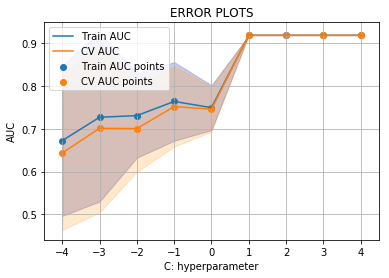

In [83]:
train_bow_auc= model.cv_results_['mean_train_score']
train_bow_auc_std= model.cv_results_['std_train_score']
cv_bow_auc = model.cv_results_['mean_test_score'] 
cv_bow_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
#alpha = [log(x) for x in a]
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_bow_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_bow_auc - train_bow_auc_std,train_bow_auc + train_bow_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_bow_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_bow_auc - cv_bow_auc_std,cv_bow_auc + cv_bow_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_bow_auc, label='Train AUC points')
plt.scatter(CC, cv_bow_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [84]:
best_tuned_parameters = [{'alpha': [10]}]

0.8484545454545455


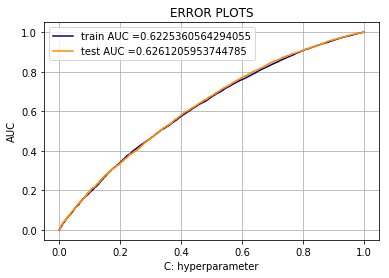

In [85]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_bow_pred = calibrated_clf.predict_proba(X_tr_bow)[:,1]
y_test_bow_pred = calibrated_clf.predict_proba(X_te_bow)[:,1]

print(calibrated_clf.score(X_te_bow, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_bow_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_bow_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='darkblue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [86]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [87]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_bow_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_bow_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.34591879917249196 for threshold 0.838
[[ 5886  4267]
 [22927 33920]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.34972125543461613 for threshold 0.837
[[ 2923  2078]
 [11246 16753]]


the maximum value of tpr*(1-fpr) 0.34591879917249196 for threshold 0.838


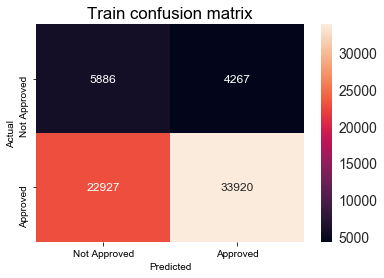

the maximum value of tpr*(1-fpr) 0.34972125543461613 for threshold 0.837


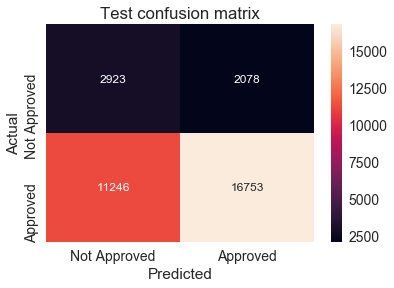

In [88]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_bow_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)
pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_bow_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


# penalty='l1'

In [89]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced",penalty='l1'), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_bow, y_train)

print(model.best_estimator_)
print(model.score(X_te_bow, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefin

SGDClassifier(alpha=100, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

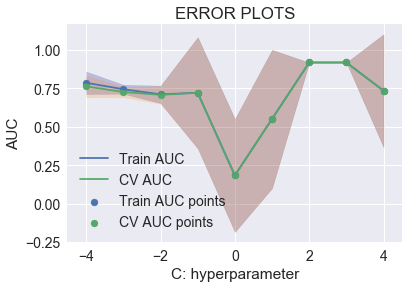

In [90]:
train_bow_auc= model.cv_results_['mean_train_score']
train_bow_auc_std= model.cv_results_['std_train_score']
cv_bow_auc = model.cv_results_['mean_test_score'] 
cv_bow_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
#alpha = [log(x) for x in a]
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_bow_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_bow_auc - train_bow_auc_std,train_bow_auc + train_bow_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_bow_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_bow_auc - cv_bow_auc_std,cv_bow_auc + cv_bow_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_bow_auc, label='Train AUC points')
plt.scatter(CC, cv_bow_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [91]:
best_tuned_parameters = [{'alpha': [100]}]

0.8484545454545455


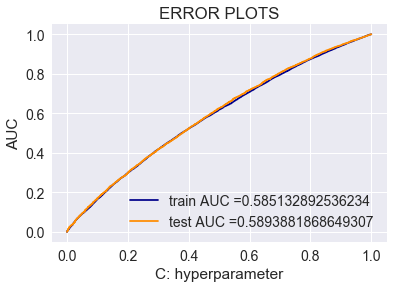

In [92]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_bow_pred = calibrated_clf.predict_proba(X_tr_bow)[:,1]
y_test_bow_pred = calibrated_clf.predict_proba(X_te_bow)[:,1]

print(calibrated_clf.score(X_te_bow, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_bow_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_bow_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)),color='darkblue')
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)),color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [93]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [94]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_bow_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_bow_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.31501805686106166 for threshold 0.839
[[ 5559  4594]
 [24140 32707]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3169025682702311 for threshold 0.839
[[ 2728  2273]
 [11733 16266]]


the maximum value of tpr*(1-fpr) 0.31501805686106166 for threshold 0.839


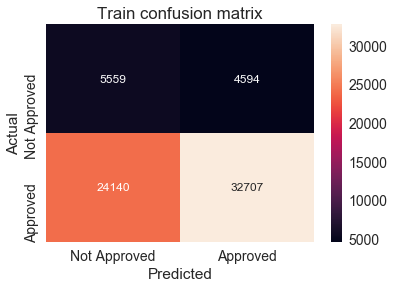

the maximum value of tpr*(1-fpr) 0.3169025682702311 for threshold 0.839


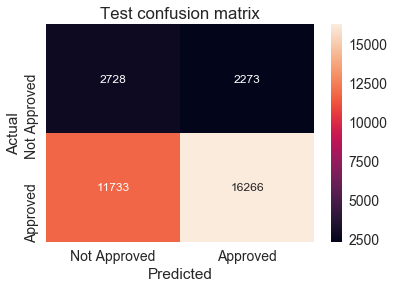

In [95]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_bow_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)
pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_bow_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
</ol>

<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

In [154]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_text_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_text_tfidf, X_test_title_tfidf , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | tfidf")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix | tfidf
(67000, 28689) (67000,)
(33000, 28689) (33000,)


# penalty='l2'

In [155]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_tfidf, y_train)

print(model.best_estimator_)
print(model.score(X_te_tfidf, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


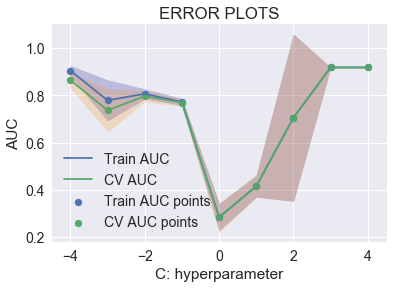

In [156]:
train_tf_auc= model.cv_results_['mean_train_score']
train_tf_auc_std= model.cv_results_['std_train_score']
cv_tf_auc = model.cv_results_['mean_test_score'] 
cv_tf_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)


plt.plot(CC, train_tf_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_tf_auc - train_tf_auc_std,train_tf_auc + train_tf_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_tf_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_tf_auc - cv_tf_auc_std,cv_tf_auc + cv_tf_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_tf_auc, label='Train AUC points')
plt.scatter(CC, cv_tf_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [157]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8485151515151516


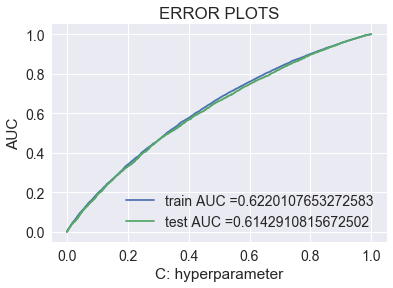

In [158]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tf_pred = calibrated_clf.predict_proba(X_tr_tfidf)[:,1]
y_test_tf_pred = calibrated_clf.predict_proba(X_te_tfidf)[:,1]

#print(model.best_estimator_)
print(calibrated_clf.score(X_te_tfidf, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tf_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tf_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [159]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tf_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tf_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.34730635109413127 for threshold 0.85
[[ 5865  4288]
 [22669 34178]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.341851326866667 for threshold 0.852
[[ 2923  2078]
 [11623 16376]]


the maximum value of tpr*(1-fpr) 0.34730635109413127 for threshold 0.85


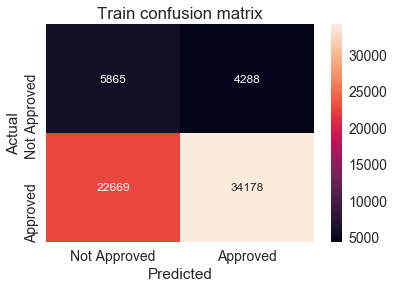

the maximum value of tpr*(1-fpr) 0.341851326866667 for threshold 0.852


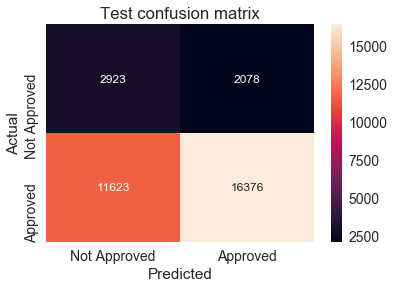

In [160]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_tf_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tf_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


# penalty='l1'

In [161]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced",penalty='l1'), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_tfidf, y_train)

print(model.best_estimator_)
print(model.score(X_te_tfidf, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefin

SGDClassifier(alpha=100, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


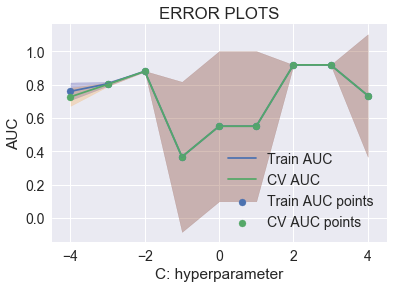

In [162]:
train_tf_auc= model.cv_results_['mean_train_score']
train_tf_auc_std= model.cv_results_['std_train_score']
cv_tf_auc = model.cv_results_['mean_test_score'] 
cv_tf_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)


plt.plot(CC, train_tf_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_tf_auc - train_tf_auc_std,train_tf_auc + train_tf_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_tf_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_tf_auc - cv_tf_auc_std,cv_tf_auc + cv_tf_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_tf_auc, label='Train AUC points')
plt.scatter(CC, cv_tf_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [163]:
best_tuned_parameters = [{'alpha': [100]}]

0.8485151515151516


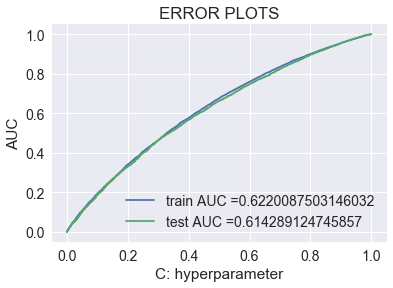

In [164]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tf_pred = calibrated_clf.predict_proba(X_tr_tfidf)[:,1]
y_test_tf_pred = calibrated_clf.predict_proba(X_te_tfidf)[:,1]

#print(model.best_estimator_)
print(calibrated_clf.score(X_te_tfidf, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tf_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tf_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [165]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tf_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tf_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3473249141599844 for threshold 0.85
[[ 5866  4287]
 [22673 34174]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.341851326866667 for threshold 0.852
[[ 2923  2078]
 [11623 16376]]


the maximum value of tpr*(1-fpr) 0.3473249141599844 for threshold 0.85


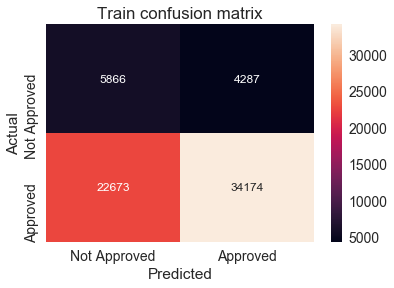

the maximum value of tpr*(1-fpr) 0.341851326866667 for threshold 0.852


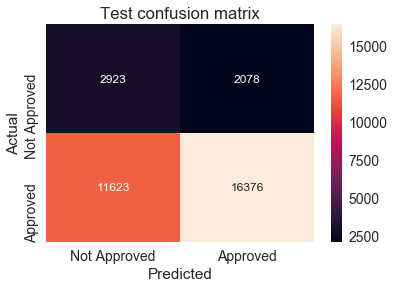

In [166]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_tf_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tf_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
        </ul>
    </li>
</ol>

In [167]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_avgW2V = hstack((X_train_essay_avg_w2v, X_train_title_avg_w2v, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_te_avgW2V = hstack((X_test_essay_avg_w2v, X_test_title_avg_w2v , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | Avg W2V")
print(X_tr_avgW2V.shape, y_train.shape)
print(X_te_avgW2V.shape, y_test.shape)
print("="*100)

Final Data matrix | Avg W2V
(67000, 19289) (67000,)
(33000, 19289) (33000,)


# penalty='l2'

In [168]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_avgW2V, y_train)

print(model.best_estimator_)
print(model.score(X_te_avgW2V, y_test))

SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

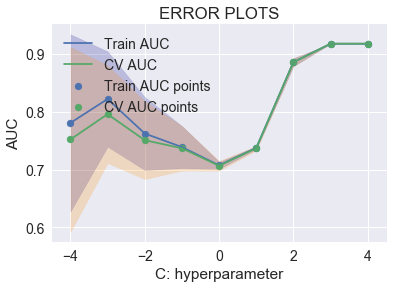

In [169]:
train_avgW2V_auc= model.cv_results_['mean_train_score']
train_avgW2V_auc_std= model.cv_results_['std_train_score']
cv_avgW2V_auc = model.cv_results_['mean_test_score'] 
cv_avgW2V_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_avgW2V_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_avgW2V_auc - train_avgW2V_auc_std,train_avgW2V_auc + train_avgW2V_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_avgW2V_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_avgW2V_auc - cv_avgW2V_auc_std,cv_avgW2V_auc + cv_avgW2V_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_avgW2V_auc, label='Train AUC points')
plt.scatter(CC, cv_avgW2V_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [171]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8484545454545455


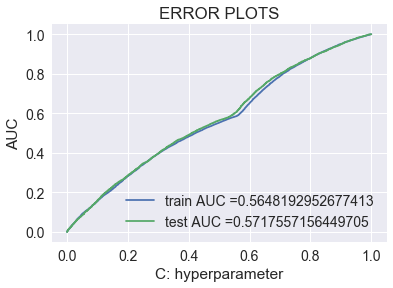

In [172]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')

calibrated_clf.fit(X_tr_avgW2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_avgW2V_pred = calibrated_clf.predict_proba(X_tr_avgW2V)[:,1]
y_test_avgW2V_pred = calibrated_clf.predict_proba(X_te_avgW2V)[:,1]

print(calibrated_clf.score(X_te_avgW2V, y_test))


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_avgW2V_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_avgW2V_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [173]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2900264058658831 for threshold 0.858
[[ 6181  3972]
 [29765 27082]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29577183245446703 for threshold 0.859
[[ 3167  1834]
 [14922 13077]]


the maximum value of tpr*(1-fpr) 0.2900264058658831 for threshold 0.858


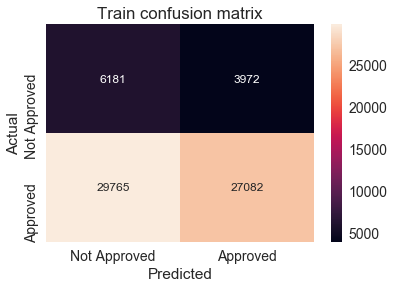

the maximum value of tpr*(1-fpr) 0.29577183245446703 for threshold 0.859


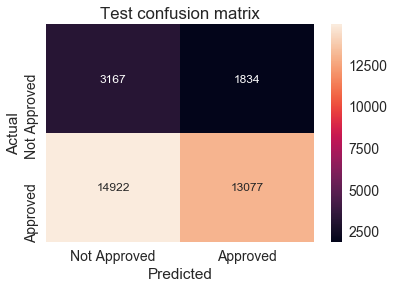

In [174]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


# penalty='l1'

In [175]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced",penalty='l1'), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_avgW2V, y_train)

print(model.best_estimator_)
print(model.score(X_te_avgW2V, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefin

SGDClassifier(alpha=10, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



0.0


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

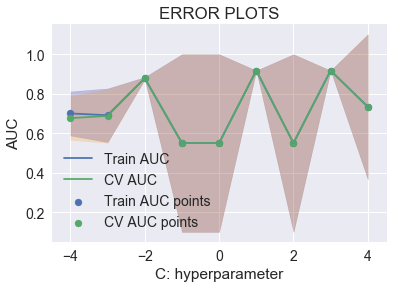

In [176]:
train_avgW2V_auc= model.cv_results_['mean_train_score']
train_avgW2V_auc_std= model.cv_results_['std_train_score']
cv_avgW2V_auc = model.cv_results_['mean_test_score'] 
cv_avgW2V_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_avgW2V_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_avgW2V_auc - train_avgW2V_auc_std,train_avgW2V_auc + train_avgW2V_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_avgW2V_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_avgW2V_auc - cv_avgW2V_auc_std,cv_avgW2V_auc + cv_avgW2V_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_avgW2V_auc, label='Train AUC points')
plt.scatter(CC, cv_avgW2V_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [177]:
best_tuned_parameters = [{'alpha': [10]}]

0.8484545454545455


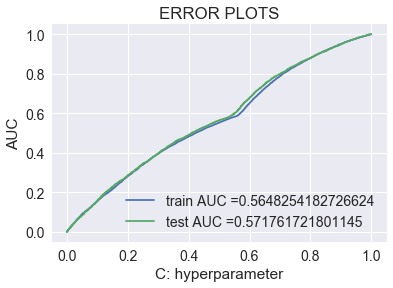

In [178]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')

calibrated_clf.fit(X_tr_avgW2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_avgW2V_pred = calibrated_clf.predict_proba(X_tr_avgW2V)[:,1]
y_test_avgW2V_pred = calibrated_clf.predict_proba(X_te_avgW2V)[:,1]

print(calibrated_clf.score(X_te_avgW2V, y_test))


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_avgW2V_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_avgW2V_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [179]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.29003454908125637 for threshold 0.858
[[ 6183  3970]
 [29773 27074]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29576306960830057 for threshold 0.859
[[ 3172  1829]
 [14943 13056]]


the maximum value of tpr*(1-fpr) 0.29003454908125637 for threshold 0.858


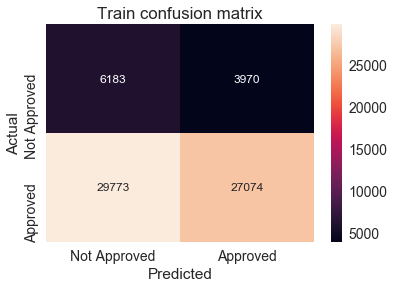

the maximum value of tpr*(1-fpr) 0.29576306960830057 for threshold 0.859


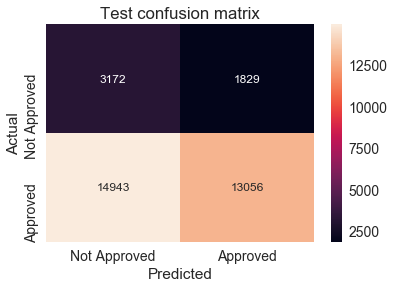

In [180]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>
        </ul>
    </li>
</ol>

In [181]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf_W2V = hstack((tr_tfidf_w2v_essay_vectors, tr_tfidf_w2v_title_vectors, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_te_tfidf_W2V = hstack((te_tfidf_w2v_essay_vectors, te_tfidf_w2v_title_vectors , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | TFIDF W2V")
print(X_tr_tfidf_W2V.shape, y_train.shape)
print(X_te_tfidf_W2V.shape, y_test.shape)
print("="*100)

Final Data matrix | TFIDF W2V
(67000, 19289) (67000,)
(33000, 19289) (33000,)


# penalty='l2'

In [182]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_tfidf_W2V, y_train)

print(model.best_estimator_)
print(model.score(X_te_tfidf_W2V, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

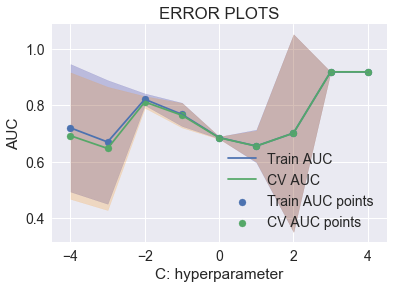

In [183]:
train_tfidf_w2v_auc= model.cv_results_['mean_train_score']
train_tfidf_w2v_auc_std= model.cv_results_['std_train_score']
cv_tfidf_w2v_auc = model.cv_results_['mean_test_score'] 
cv_tfidf_w2v_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_tfidf_w2v_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_tfidf_w2v_auc - train_tfidf_w2v_auc_std,train_tfidf_w2v_auc + train_tfidf_w2v_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_tfidf_w2v_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_tfidf_w2v_auc - cv_tfidf_w2v_auc_std,cv_tfidf_w2v_auc + cv_tfidf_w2v_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_tfidf_w2v_auc, label='Train AUC points')
plt.scatter(CC, cv_tfidf_w2v_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [184]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8484545454545455


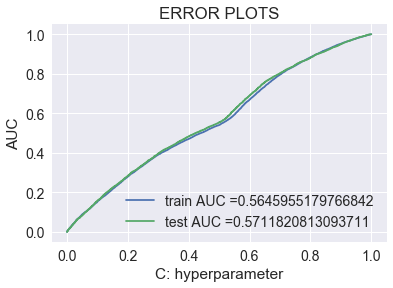

In [185]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#

model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_tfidf_W2V, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_w2v_pred = calibrated_clf.predict_proba(X_tr_tfidf_W2V)[:,1]
y_test_tfidf_w2v_pred = calibrated_clf.predict_proba(X_te_tfidf_W2V)[:,1]

print(calibrated_clf.score(X_te_tfidf_W2V, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tfidf_w2v_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tfidf_w2v_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [186]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_w2v_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_w2v_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.28314388844469957 for threshold 0.857
[[ 6218  3935]
 [30565 26282]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2903620497372721 for threshold 0.856
[[ 3033  1968]
 [14594 13405]]


the maximum value of tpr*(1-fpr) 0.28314388844469957 for threshold 0.857


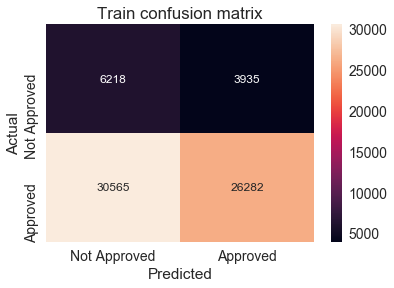

the maximum value of tpr*(1-fpr) 0.2903620497372721 for threshold 0.856


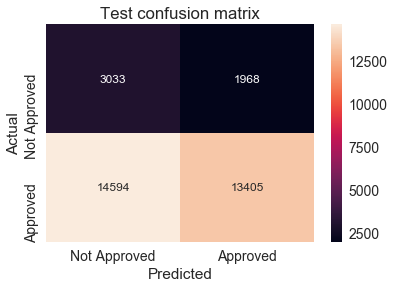

In [187]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_tfidf_w2v_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tfidf_w2v_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


# penalty='l1'

In [129]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced",penalty='l1'), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_tfidf_W2V, y_train)

print(model.best_estimator_)
print(model.score(X_te_tfidf_W2V, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefin

SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

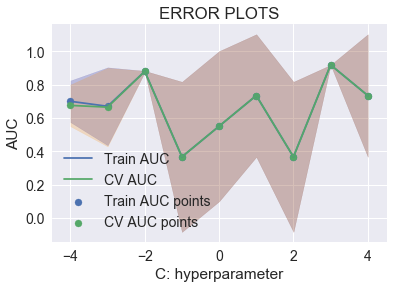

In [130]:
train_tfidf_w2v_auc= model.cv_results_['mean_train_score']
train_tfidf_w2v_auc_std= model.cv_results_['std_train_score']
cv_tfidf_w2v_auc = model.cv_results_['mean_test_score'] 
cv_tfidf_w2v_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_tfidf_w2v_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_tfidf_w2v_auc - train_tfidf_w2v_auc_std,train_tfidf_w2v_auc + train_tfidf_w2v_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_tfidf_w2v_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_tfidf_w2v_auc - cv_tfidf_w2v_auc_std,cv_tfidf_w2v_auc + cv_tfidf_w2v_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_tfidf_w2v_auc, label='Train AUC points')
plt.scatter(CC, cv_tfidf_w2v_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [131]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8484545454545455


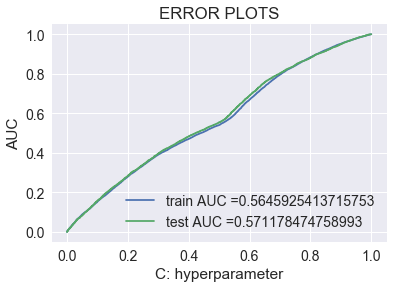

In [132]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# error
# AttributeError: probability estimates are not available for loss='hinge'
# solution
# https://github.com/scikit-learn/scikit-learn/issues/7278
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#     The class CalibratedClassifierCV uses a cross-validation generator and estimates for each
#     split the model parameter on the train samples and the calibration of the test samples. 
#     The probabilities predicted for the folds are then averaged.
#

model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_tfidf_W2V, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_w2v_pred = calibrated_clf.predict_proba(X_tr_tfidf_W2V)[:,1]
y_test_tfidf_w2v_pred = calibrated_clf.predict_proba(X_te_tfidf_W2V)[:,1]

print(calibrated_clf.score(X_te_tfidf_W2V, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_tfidf_w2v_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_tfidf_w2v_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [133]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_w2v_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_w2v_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.28314388844469957 for threshold 0.857
[[ 6218  3935]
 [30565 26282]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2903620497372721 for threshold 0.856
[[ 3033  1968]
 [14594 13405]]


the maximum value of tpr*(1-fpr) 0.28314388844469957 for threshold 0.857


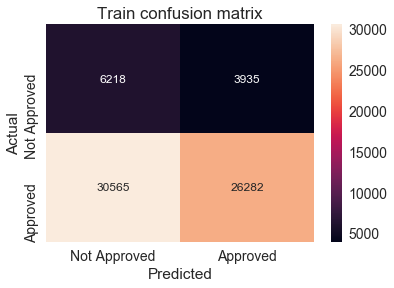

the maximum value of tpr*(1-fpr) 0.2903620497372721 for threshold 0.856


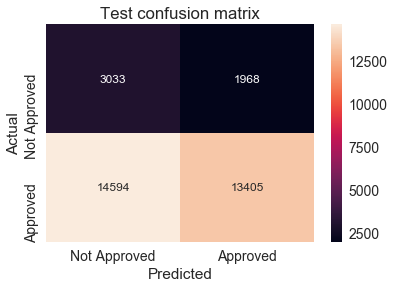

In [134]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_tfidf_w2v_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tfidf_w2v_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [135]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<ol>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
</ol>

here$$$

In [136]:
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)

from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm

n_range=[i for i in range(0,5000,500)]
print(n_range)
y_essay_text_svd = []

for i in tqdm(n_range):
    svd = TruncatedSVD(n_components=i)
    svd.fit(X_train_text_tfidf)
    #print(svd.explained_variance_ratio_) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    y_essay_text_svd.append(svd.explained_variance_ratio_.sum())
print(y_essay_text_svd)

(67000, 5000) (67000,)
(33000, 5000) (33000,)
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:14:42<00:00, 690.95s/it]


[0.0, 0.45029315989868846, 0.6061637967699475, 0.7079917577710831, 0.7840450485864585, 0.8442967911250907, 0.8932662007122627, 0.9334179217940052, 0.9655247772222225, 0.9885821708917868]


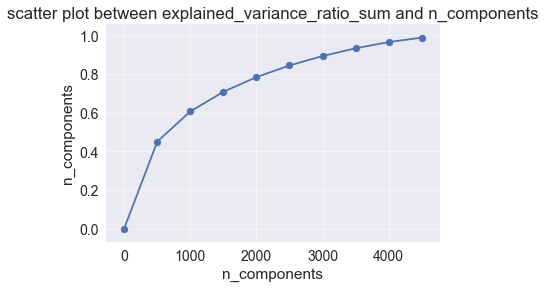

In [137]:
#scatter plot
plt.plot(n_range,y_essay_text_svd)
plt.scatter(n_range,y_essay_text_svd)
plt.title('scatter plot between explained_variance_ratio_sum and n_components')
plt.xlabel('n_components')
plt.ylabel('n_components')
plt.grid(b=True, linewidth=0.5)
plt.show()

### n_Component is 500 as per the graph

In [138]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500)
svd.fit(X_train_text_tfidf)

X_train_text_tfidf_svd = svd.transform(X_train_text_tfidf)
X_test_text_tfidf_svd = svd.transform(X_test_text_tfidf)

print(X_train_text_tfidf_svd.shape)
print(X_test_text_tfidf_svd.shape)

(67000, 500)
(33000, 500)


In [139]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_SET5 = hstack((X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm,X_train_neg_norm,X_train_pos_norm,X_train_neu_norm,X_train_compound_norm,X_train_title_wc_norm,X_train_essay_wc_norm,X_train_text_tfidf_svd)).tocsr()
X_te_SET5 = hstack((X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm,X_test_neg_norm,  X_test_pos_norm, X_test_neu_norm, X_test_compound_norm, X_test_title_wc_norm, X_test_essay_wc_norm,X_test_text_tfidf_svd)).tocsr()

print("Final Data matrix | SET 5")
print(X_tr_SET5.shape, y_train.shape)
print(X_te_SET5.shape, y_test.shape)
print("="*100)

Final Data matrix | SET 5
(67000, 608) (67000,)
(33000, 608) (33000,)


# penalty='l2'

In [140]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_SET5, y_train)

print(model.best_estimator_)
print(model.score(X_te_SET5, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


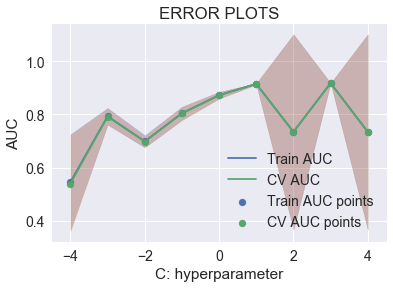

In [143]:
train_SET5_auc= model.cv_results_['mean_train_score']
train_SET5_auc_std= model.cv_results_['std_train_score']
cv_SET5_auc = model.cv_results_['mean_test_score'] 
cv_SET5_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_SET5_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_SET5_auc - train_SET5_auc_std,train_SET5_auc + train_SET5_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_SET5_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_SET5_auc - cv_SET5_auc_std,cv_SET5_auc + cv_SET5_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_SET5_auc, label='Train AUC points')
plt.scatter(CC, cv_SET5_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

In [144]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8484545454545455


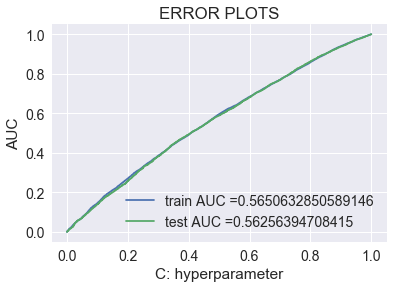

In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_SET5, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_SET5_pred = calibrated_clf.predict_proba(X_tr_SET5)[:,1]
y_test_SET5_pred = calibrated_clf.predict_proba(X_te_SET5)[:,1]

print(calibrated_clf.score(X_te_SET5, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_SET5_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_SET5_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [146]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_SET5_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_SET5_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2989062668974426 for threshold 0.842
[[ 5314  4839]
 [24382 32465]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29834351712464036 for threshold 0.843
[[ 2647  2354]
 [12217 15782]]


the maximum value of tpr*(1-fpr) 0.2989062668974426 for threshold 0.842


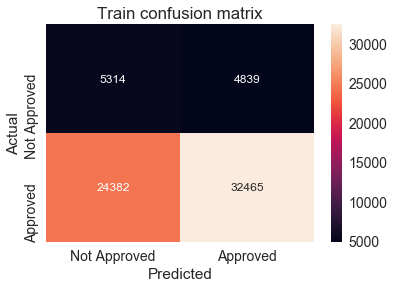

the maximum value of tpr*(1-fpr) 0.29834351712464036 for threshold 0.843


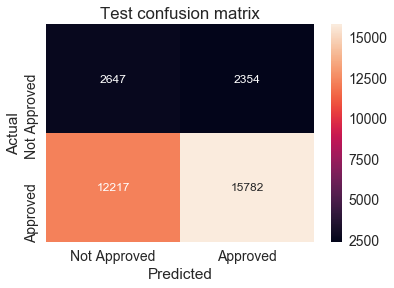

In [147]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_SET5_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_SET5_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


# penalty='l1'

In [148]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier

c_range=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]
paramgrid=dict(alpha=c_range)

#Using GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced",penalty='l1'), paramgrid, scoring = 'f1', cv=5)
model.fit(X_tr_SET5, y_train)

print(model.best_estimator_)
print(model.score(X_te_SET5, y_test))

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\samar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Undefin

SGDClassifier(alpha=1000, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.9180150494270398


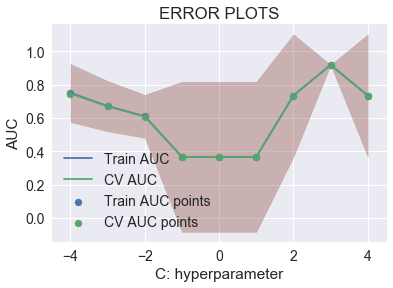

In [149]:
train_SET5_auc= model.cv_results_['mean_train_score']
train_SET5_auc_std= model.cv_results_['std_train_score']
cv_SET5_auc = model.cv_results_['mean_test_score'] 
cv_SET5_auc_std= model.cv_results_['std_test_score']

CC = []
from math import log
CC = [np.log10(x) for x in c_range]
#print(CC)

plt.plot(CC, train_SET5_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,train_SET5_auc - train_SET5_auc_std,train_SET5_auc + train_SET5_auc_std,alpha=0.2,color='darkblue')

plt.plot(CC, cv_SET5_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(CC,cv_SET5_auc - cv_SET5_auc_std,cv_SET5_auc + cv_SET5_auc_std,alpha=0.2,color='darkorange')

plt.scatter(CC, train_SET5_auc, label='Train AUC points')
plt.scatter(CC, cv_SET5_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<ol>
    
    <strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
    
    
</ol>

In [150]:
best_tuned_parameters = [{'alpha': [1000]}]

0.8484545454545455


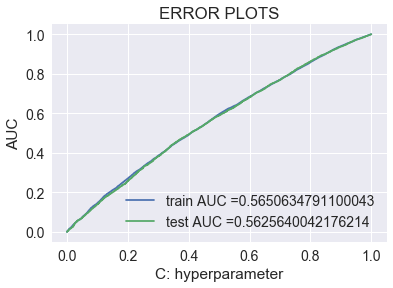

In [151]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
model = GridSearchCV(SGDClassifier(loss='hinge', class_weight="balanced"), best_tuned_parameters)
calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_tr_SET5, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_SET5_pred = calibrated_clf.predict_proba(X_tr_SET5)[:,1]
y_test_SET5_pred = calibrated_clf.predict_proba(X_te_SET5)[:,1]

print(calibrated_clf.score(X_te_SET5, y_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_SET5_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_SET5_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_SET5_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_SET5_pred, te_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2989062668974426 for threshold 0.842
[[ 5314  4839]
 [24382 32465]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29834351712464036 for threshold 0.843
[[ 2647  2354]
 [12217 15782]]


the maximum value of tpr*(1-fpr) 0.2989062668974426 for threshold 0.842


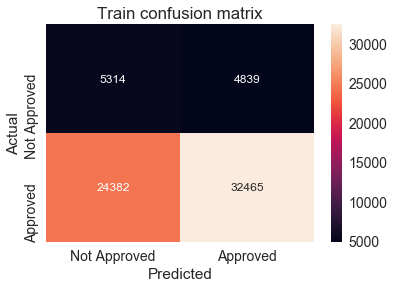

the maximum value of tpr*(1-fpr) 0.29834351712464036 for threshold 0.843


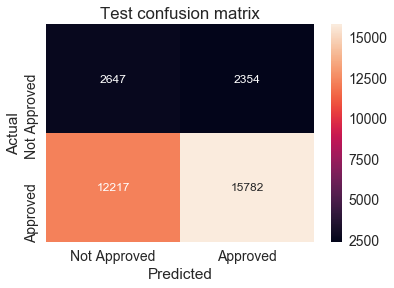

In [153]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as pltTr
import matplotlib.pyplot as pltTe

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTr=confusion_matrix(y_train, predict(y_train_SET5_pred, tr_thresholds, train_fpr, train_tpr))
df_cmTr = pdH.DataFrame(arrayTr,range(2),range(2))
#print(arrayTr)
# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = pltTr.axes()

snTr.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

snTr.heatmap(df_cmTr, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit

labels=['Not Approved','Approved']
axTr.set_xticklabels(labels)
axTr.set_yticklabels(labels)

pltTr.title("Train confusion matrix")
pltTr.xlabel("Predicted")
pltTr.ylabel("Actual")
pltTr.show()

# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
#fig, ax =plt.subplots(1,1)

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_SET5_pred, te_thresholds, test_fpr, test_tpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))

axTe = pltTe.axes()

snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit

axTe.set_xticklabels(labels)
axTe.set_yticklabels(labels)
pltTe.title("Test confusion matrix")
pltTe.xlabel("Predicted")
pltTe.ylabel("Actual")
pltTe.show()


<h1>3. Conclusion</h1>

In [188]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Algorithm", "penalty", "Hyper parameter", "AUC"]

x.add_row(["BOW", "SGDClassifier(loss='hinge')", "l2", 10, 0.6261205 ])
x.add_row(["BOW", "SGDClassifier(loss='hinge')", "l1", 100, 0.58938818 ])
x.add_row(["TFIDF", "SGDClassifier(loss='hinge')", "l2", 1000, 0.614291081 ]) 
x.add_row(["TFIDF", "SGDClassifier(loss='hinge')", "l1", 100, 0.614289124 ]) 
x.add_row(["AVG W2V", "SGDClassifier(loss='hinge')", "l2", 1000, 0.5717557 ]) 
x.add_row(["AVG W2V", "SGDClassifier(loss='hinge')", "l1", 10, 0.571761721 ]) 
x.add_row(["TFIDF W2V", "SGDClassifier(loss='hinge')", "l2", 1000, 0.57118208 ]) 
x.add_row(["TFIDF W2V", "SGDClassifier(loss='hinge')", "l1", 1000, 0.57117847 ])
x.add_row(["SET 5", "SGDClassifier(loss='hinge')", "l2", 1000, 0.5625639 ])
x.add_row(["SET 5", "SGDClassifier(loss='hinge')", "l1", 1000, 0.5625640 ])

print(x)

+------------+-----------------------------+---------+-----------------+-------------+
| Vectorizer |          Algorithm          | penalty | Hyper parameter |     AUC     |
+------------+-----------------------------+---------+-----------------+-------------+
|    BOW     | SGDClassifier(loss='hinge') |    l2   |        10       |  0.6261205  |
|    BOW     | SGDClassifier(loss='hinge') |    l1   |       100       |  0.58938818 |
|   TFIDF    | SGDClassifier(loss='hinge') |    l2   |       1000      | 0.614291081 |
|   TFIDF    | SGDClassifier(loss='hinge') |    l1   |       100       | 0.614289124 |
|  AVG W2V   | SGDClassifier(loss='hinge') |    l2   |       1000      |  0.5717557  |
|  AVG W2V   | SGDClassifier(loss='hinge') |    l1   |        10       | 0.571761721 |
| TFIDF W2V  | SGDClassifier(loss='hinge') |    l2   |       1000      |  0.57118208 |
| TFIDF W2V  | SGDClassifier(loss='hinge') |    l1   |       1000      |  0.57117847 |
|   SET 5    | SGDClassifier(loss='hinge') 

# 4. Summary

## Step followed

--------------

- Preprocessing of 
	Project_subject_categories 
	Project_subject_subcategories
	project_grade_category
	teacher_prefix
	Project_essay 
	Project_title
	project_resource_summary
	
- Numeric feature for Text
    no of words in essay
    lenght of each cell in essay
    no of words in Title
    lenght of each cell in Title
    no of words in Project resource summary
    lenght of each cell in Project resource summary
	
- Using Pretrained Models: Avg W2V
- Computing Sentiment Scores for Project essay. Added below columns
	neg
	pos
	neu
	compound

- Added all the features to project_data	

- Took data points for doing the assignment and separate the Class lable (Project_is_approved)
- Splitting Data into Train and Test.

- Making datamodel ready

    #####  text

                - encoding of school_state is splited into Train and Test vector
                - encoding of clean_category is splited into Train and Test vector
                - encoding of clean_subcategory is splited into Train and Test vector
                - encoding of project_grade_category is splited into Train and Test vector
                - encoding of teacher_prefix is splited into Train and Test vector
                - encoding of project_resource_summary is splited into Train and Test vector
				
	##### numeric
                - encoding of quantity is splited into Train and Test vector	
                - encoding of teacher_number_of_previously_posted_projects is splited into Train and Test vector
				- encoding of price is splited into Train and Test vector				
				- encoding of sentimental score | neg, is splited into Train and Test vector
				- encoding of sentimental score | pos, is splited into Train and Test vector
				- encoding of sentimental score | neu, is splited into Train and Test vector
				- encoding of sentimental score | compound, is splited into Train and Test vector
				- encoding of numerical | number of words in the title, is splited into Train and Test vector
				- encoding of numerical | number of words in the essay, is splited into Train and Test vector
                - encoding of project_essay(BOW) is splited into Train and Test vector				
                - encoding of project_title(BOW) is splited into Train and Test vector
                - encoding of project_essay(TFIDF) is splited into Train and Test vector
                - encoding of project_title(TFIDF) is splited into Train and Test vector
                - encoding of project_essay(AVG W2V) is splited into Train and Test vector
                - encoding of project_title(AVG W2V) is splited into Train and Test vector
                - encoding of project_essay(TFIDF W2V) is splited into Train and Test vector
                - encoding of project_title(TFIDF W2V) is splited into Train and Test vector
		
### For SET 1
#### Merging all the above features for SET 1
  - Horizontally merging( with hstack) all categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)
  Penalty='l2'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap.  
  
  Penalty='l1'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge',penalty='l1'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap.  
  
  
### For SET 2
#### Merging all the above features for SET 2
  - Horizontally merging( with hstack) all categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)
  Penalty='l2'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 

  Penalty='l1'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge',penalty='l1'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 
  
### For SET 3
#### Merging all the above features for SET 3
  - Horizontally merging( with hstack) all categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V)
  Penalty='l2'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 

  Penalty='l1'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge',penalty='l1'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 
  
### For SET 4
#### Merging all the above features for SET 4
  - Horizontally merging( with hstack) all categorical, numerical features + project_title(TFIDF W2V) + preprocessed_essay (TFIDF W2V)
  Penalty='l2'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 

  Penalty='l1'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge',penalty='l1'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap.    
    

### For SET 5
 - For various value of features, model on trancatedSVD and draw the plot between various no of features and explained_variance_ratio
 - choose the best no of feature, by elbow method, seeing the above graph.
 - fit trancatedSVD on no of best feature, and tranform it on train and test tfidf values
#### Merging all the above features for SET 5
  - Horizontally merging( with hstack) all categorical, numerical features + four sentiment score + word count for project title + word count for combine essay + essay text by applying TruncatedSVD
  Penalty='l2'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap. 

  Penalty='l1'
  - Fit a model on on train (on above merge features) data by using GridSearchCV(SGDClassifier(loss='hinge',penalty='l1'))
  - Draw a graph in Train and CV for varies values of alpha
  - Take Best_Alpha by best_estimator_ and draw graph for Test_AUC
  - Create Confusion matrix, in heatmap.  